## Fibonacci sequence

F(1) = 1, F(2) = 1, F(n) = F(n - 2) + F(n - 1)

Fibonacci numbers grow exponentially. Here is a chart showing exponential growth of Fibonacci numbers.

In [7]:
def generate_fibonacci(n_terms):
    fib = [1, 1]
    for _ in range(2, n_terms):
        fib.append(fib[-1] + fib[-2])
    return fib


Define number of members below:

In [20]:
N = 20

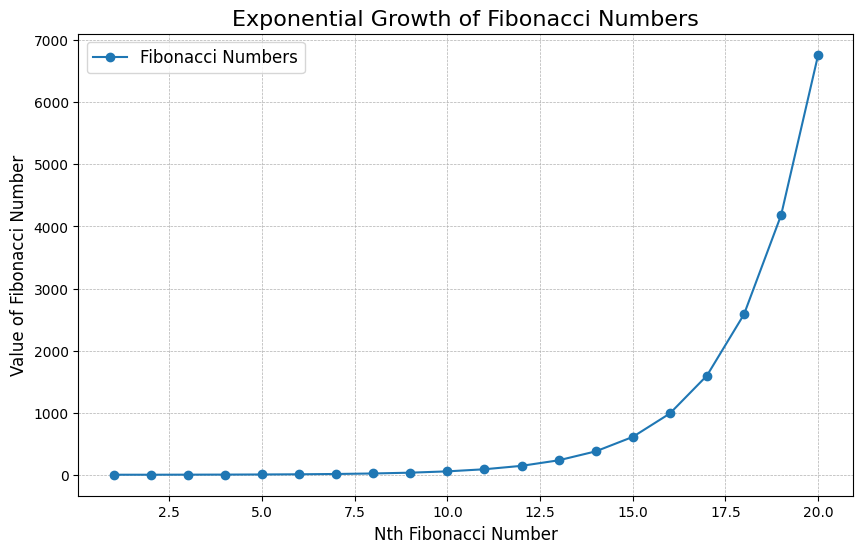

In [21]:
import matplotlib.pyplot as plt

fibonacci_numbers = generate_fibonacci(N)
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), fibonacci_numbers, marker='o', linestyle='-', label='Fibonacci Numbers')

# Chart annotations
plt.title('Exponential Growth of Fibonacci Numbers', fontsize=16)
plt.xlabel('Nth Fibonacci Number', fontsize=12)
plt.ylabel('Value of Fibonacci Number', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

## Non-optimal Solution

Find the sum of the even-valued terms. Here is a brute-force solution:

In [22]:
def sum_of_even_fibonacci_bad(limit: int) -> int:
    a, b = 1, 1
    even_sum = 0    
    while b < limit:
        if b % 2 == 0:
            even_sum += b
        a, b = b, a + b
    
    return even_sum

In [25]:
Limit = 4000000
print(sum_of_even_fibonacci_bad(Limit))

4613732


Our algorithm has a time complexity of 
𝑂(log(𝑁)) and space complexity of 𝑂(1).

## Optimized solution

The sequence alternates in a repeating pattern of odd (O) and even (E):

O O E O O E O O E...

If E - even members of Fibonacci sequence we can easily proof that

E(n) = 4 * E (n - 1) + E (n - 2)

Let's rewrite our solution using this knowledge.

In [24]:
def sum_of_even_fibonacci(limit: int) -> int:
    even1, even2 = 2, 8  # F(3) = 2, F(6) = 8
    even_sum = even1

    while even2 < limit:
        even_sum += even2
        even1, even2 = even2, 4 * even2 + even1

    return even_sum

In [26]:
print(sum_of_even_fibonacci(Limit))

4613732


Time complexity improves from 𝑂(log(𝑁)) to 𝑂(log(log(𝑁))).